# Random Forest 

### 1. What is Random Forest algorithm?
- It is a bagging or bootstraping Technique. For understanding bagging see my preious notebook.

- First, Random Forest algorithm is a supervised classification algorithm. We can see it from its name, which is to create a forest by some way and make it random.
- There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result.
- The difference between Random Forest algorithm and the decision tree algorithm is that in Random Forest, the process es of finding the root node and splitting the feature nodes will run randomly.

### 2. Why Random Forest algorithm?
 1. Overfitting is one critical problem that may make the results worse, but for Random Forest algorithm, if there are enough trees in the forest, the classifier won’t overfit the model. 
 2. Random Forest can handle missing values, and the last advantage is that the Random Forest classifier can be modeled for categorical values.
 3. No nedd for feature scalling in random forest.

### 3. How Random Forest algorithm works?
- There are two step
    1. Creation Of Random Forest
    2. Prediction Of Random Forest
    
##### - 1. Created Random Forest


* Randomly select “K” features from total “m” features where k << m
* Among the “K” features, calculate the node “d” using the best split point
* Split the node into daughter nodes using the best split
* Repeat the a to c steps until “l” number of nodes has been reached
* Build forest by repeating steps a to d for “n” number times to create “n” number of trees

#####  -  2. Prediction Random Forest
     

* Takes the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome (target)
* Calculate the votes for each predicted target
* Consider the high voted predicted target as the final prediction from the random forest algorithm

See the Diagram: 

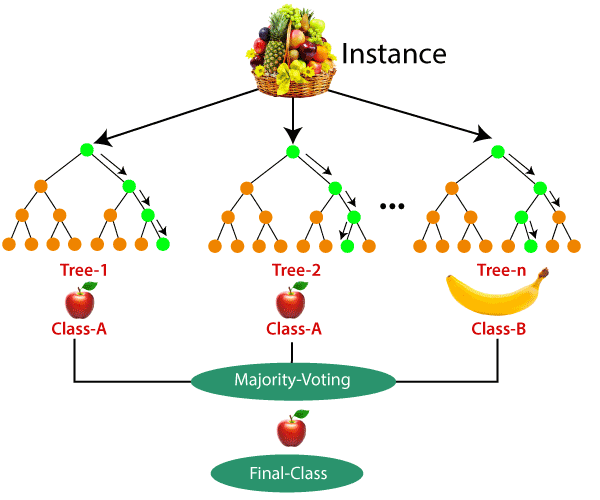

- Here Main thing is that it apply majority vote on dataset , as you see above have 2apple and one banana, so to apply majority vote apply wins, so it predict apple. 

### Before Going Randomforest Implementation I am shown you how bagging Works:

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset.data
y = dataset.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=3)

In [ ]:
#Only Knn classifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

In [ ]:
#bagging over our KNN classifier
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True) 
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

- See here if i use only Knn classifier then the accuracy 63.88 , But when i use  bagging over our KNN classifier and see our score improves to 69.44. So now you think how powerful bagging is?

## Now Implement Randomforest

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()